<a href="https://colab.research.google.com/github/kislay960/Data-Science-Practice/blob/main/Dominant_colour_extraction_for_image_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import cv2

In [38]:
im = cv2.imread('/content/elephant.jpg')
print(im.shape)

(330, 500, 3)


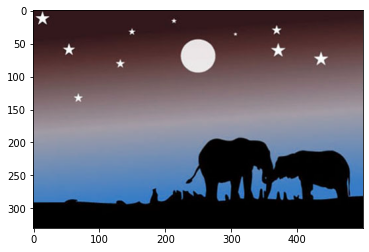

In [39]:
plt.imshow(im) #BGR format(default of cv2)
plt.show()

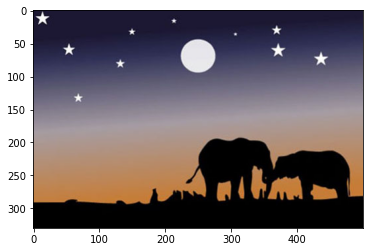

In [40]:
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
plt.imshow(im) # RGB Format
plt.show()

In [41]:
#Flattening
all_pixels = im.reshape((330*500,3))
all_pixels.shape

(165000, 3)

In [42]:
from sklearn.cluster import KMeans

In [43]:
dominant_colors = 5
km = KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [44]:
import numpy as np
centers = km.cluster_centers_
centers = np.array(centers,dtype='uint8')
centers

array([[ 37,  35,  64],
       [188, 133,  85],
       [166, 151, 152],
       [ 97,  94, 117],
       [  1,   0,   1]], dtype=uint8)

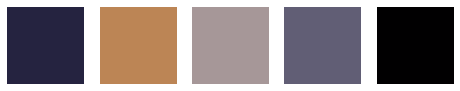

In [45]:
#Plotting the k most dominant colours
i = 1
plt.figure(figsize=(8,2))
colors = []

for each_col in centers:
    plt.subplot(1,5,i)
    plt.axis("off")
    i+=1
    colors.append(each_col)
    
    #Color Swatch
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
    
plt.show()

In [46]:
new_img = np.zeros((330*500,3),dtype='uint8')

In [47]:
colors

[array([37, 35, 64], dtype=uint8),
 array([188, 133,  85], dtype=uint8),
 array([166, 151, 152], dtype=uint8),
 array([ 97,  94, 117], dtype=uint8),
 array([1, 0, 1], dtype=uint8)]

In [48]:
km.labels_

array([0, 0, 0, ..., 4, 4, 4], dtype=int32)

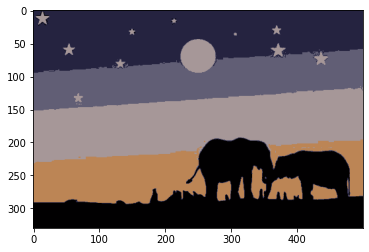

In [49]:
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]

new_img = new_img.reshape((330,500,3))
plt.imshow(new_img)
plt.show()

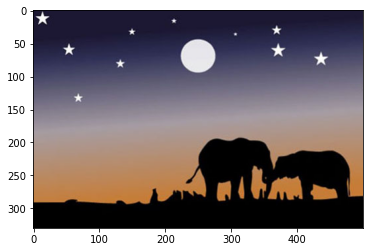

In [50]:
plt.imshow(im)
plt.show()